Import Libraries and Code that will be used throughout the notebook:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

# Tasks:
- Top comics. Add function which will extract most common word
- Most popular rating(Tells us audience and market)
- Years with highest number of comics(Rate of publishing). Maybe add prediction
- Average Prices
- Most expensive comic
- Most popular pencilier
- Most popular cover_artist
- Imprint
- Format


In [2]:
df = pd.read_csv('Marvel_Comics.csv')
df

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",None,Marvel Universe,Infinite Comic,None,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,None,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,None,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,None,Free
...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,"March 06, 2019",NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,$3.99
34988,Zombie (2006),(2006),Zombie (2006) #4,"December 20, 2006",With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34989,Zombie (2006),(2006),Zombie (2006) #3,"November 29, 2006",The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34990,Zombie (2006),(2006),Zombie (2006) #2,"October 25, 2006","For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99


# Data Cleaning:

Let us clean the dates we were given.

In [3]:
# create a date and year column
df[['date', 'year']] = df['publish_date'].str.split(', ', expand=True)
new_df = df.drop(['active_years', 'publish_date'], axis=1)


# clean the dates
mask = (new_df['year'] == '-0001') | (new_df['year'] == '2029')
new_df['year'][mask] = df['issue_title'][mask]
new_df[['delete', 'year2']] = new_df['year'][mask].str.split('(', expand=True)
new_df = new_df.drop(['delete'], axis=1)
new_df[['year3', 'delete']] = new_df['year2'][mask].str.split(')', expand=True)
new_df['year'][mask] = new_df['year3'][mask]
new_df = new_df.drop(['delete', 'year2', 'year3'], axis=1)

mask = (new_df['year'] == 'Hardcover') | (new_df['year'] == None) | (new_df['year'] == 'Digest') | (new_df['year'] == 'Trade Paperback')
new_df['year'][mask] = np.nan

Clean the price column:

In [4]:
new_df['Price'][new_df['Price'] == ' Free'] = ' $Free'
new_df['Price'][new_df['Price'] == 'None'] = np.nan

new_df[['sign', 'price($)']] = new_df['Price'].str.split('$', expand=True)
new_df = new_df.drop(['Price', 'sign'], axis=1)
new_df

,comic_name,issue_title,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,date,year,price($)
0,A Year of Marvels: April Infinite Comic (2016),A Year of Marvels: April Infinite Comic (2016) #1,The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,April 01,2016,Free
1,A Year of Marvels: August Infinite Comic (2016),A Year of Marvels: August Infinite Comic (2016...,"It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",None,Marvel Universe,Infinite Comic,None,August 10,2016,Free
2,A Year of Marvels: February Infinite Comic (2016),A Year of Marvels: February Infinite Comic (20...,Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,None,Marvel Universe,Infinite Comic,Rated T+,February 10,2016,Free
3,A Year of Marvels: July Infinite Comic (2016),A Year of Marvels: July Infinite Comic (2016) #1,Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,None,June 29,2016,Free
4,A Year of Marvels: June Infinite Comic (2016),A Year of Marvels: June Infinite Comic (2016) #1,Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,None,June 15,2016,Free
...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),Ziggy Pig - Silly Seal Comics (2019) #1,NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,March 06,2019,3.99
34988,Zombie (2006),Zombie (2006) #4,With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,December 20,2006,3.99
34989,Zombie (2006),Zombie (2006) #3,The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,November 29,2006,3.99
34990,Zombie (2006),Zombie (2006) #2,"For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,October 25,2006,3.99


In [5]:
# new_df.to_csv(r'C:\Users\HP\PycharmProjects\pythonProject\venv\Scripts\AAnalysis' + '\\Clean Marvel.csv', index=False)

# Who is the audience for marvel comic books?

In [6]:
rating = new_df['Rating'].value_counts()
rating = rating[1:]
rating = rating.sort_values(ascending=True)

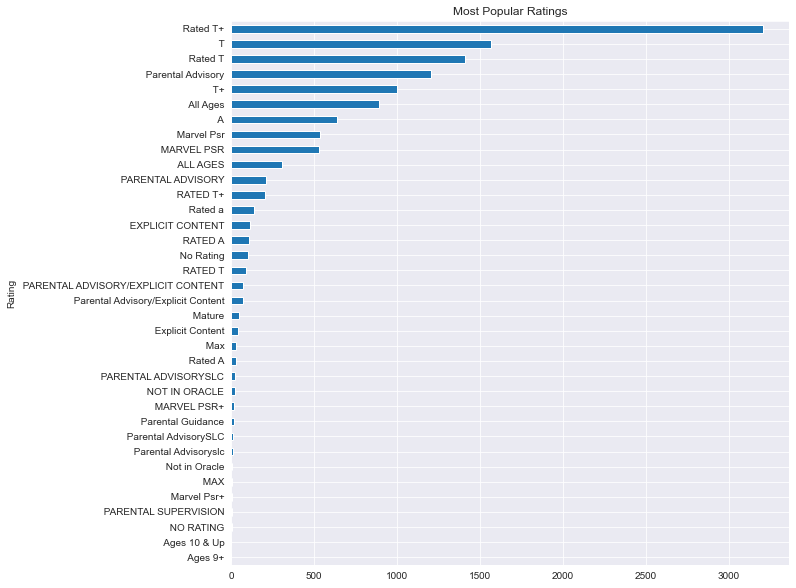

In [7]:
rating.plot(figsize=(10,10), kind='barh', xlabel='Rating', title='Most Popular Ratings');

It appears there is a disproportionately high number of comics rated T and T+. This tells us that the majority of marvel comic readers are teenagers.

# What is Marvel Comics' rate of publishing?

In [8]:
mask = new_df['year'].notnull()
rate = new_df[mask].copy()
rate['year'] = pd.to_numeric(rate['year'], errors='coerce')

In [9]:
rate = rate.groupby(['year']).count()
rate = rate.reset_index()

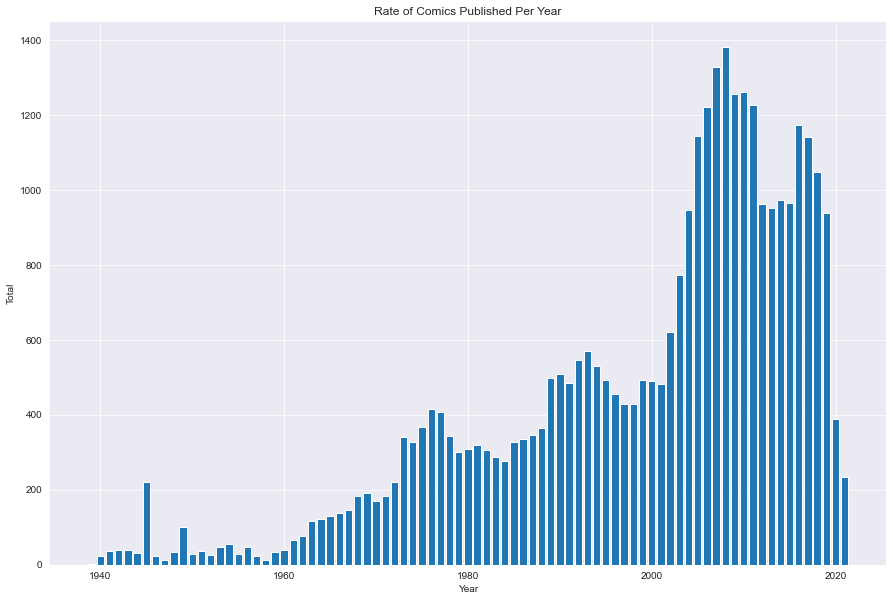

In [10]:
plt.figure(figsize=(15,10))
plt.bar(x='year', height='issue_title', data=rate)
plt.title('Rate of Comics Published Per Year')
plt.ylabel('Total')
plt.xlabel('Year');

It appears that the rate of comic books published per year, has been increasing over the years. The rate of comics published is especially high between 2000 and 2020.

# How have the average prices of comics changed over the years?

In [11]:
mask = (new_df['year'].notnull()) & (new_df['price($)'] != 'Free')
price = new_df[mask].copy()

price['price($)'] = pd.to_numeric(price['price($)'], errors='coerce')
price['year'] = pd.to_numeric(price['year'], errors='coerce')

av_price = price.groupby(['year']).mean()
av_price = av_price.reset_index()

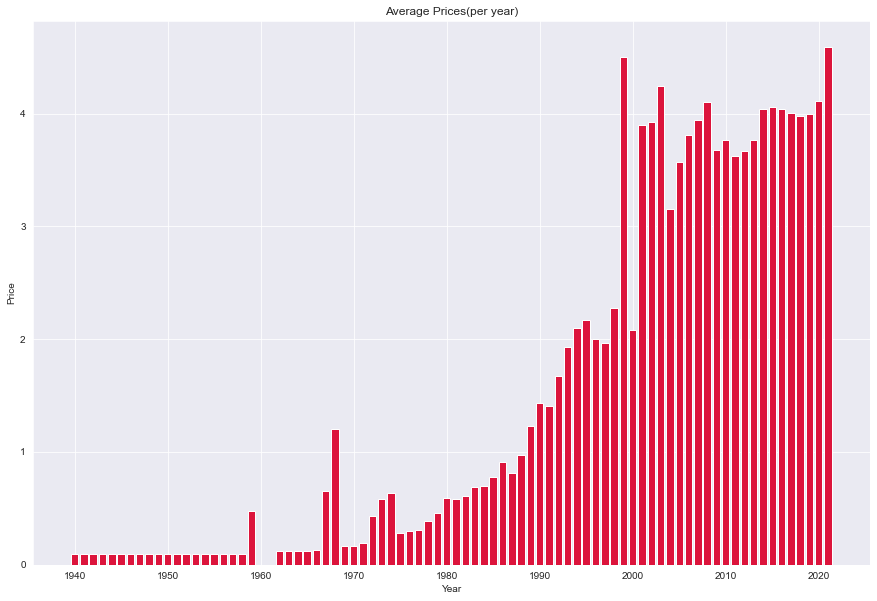

In [12]:
plt.figure(figsize=(15,10))
plt.bar(x='year', height='price($)', data=av_price, color='crimson')
plt.title('Average Prices(per year)')
plt.ylabel('Price')
plt.xlabel('Year');

It seems that comics were very cheap before 1990. We can see from the bar chart that there were years when comics were bought for less than one dollar. Average prices have sky rocketed since 2000 and it appears that they may still be in the rise.

##### Let us now look at the most expensive comic to date:

In [13]:
maximum = price['price($)'] == price['price($)'].max()
price[maximum]

,comic_name,issue_title,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,date,year,price($)
11445,Howard the Duck (1976 - 1979),Howard the Duck Omnibus (Hardcover),"Get down, America! Vote Howard the Duck in 200...",None,None,None,MARVEL UNIVERSE,Hardcover,RATED T+,July 23,2008,99.99
11446,Howard the Duck (1976 - 1979),HOWARD THE DUCK OMNIBUS HC [DM ONLY] (Hardcover),"Get down, America! Vote Howard the Duck in 200...",None,None,None,MARVEL UNIVERSE,Hardcover,RATED T+,July 23,2008,99.99
11516,Howard the Duck Annual (1977),Howard the Duck Omnibus (Hardcover),"Get down, America! Vote Howard the Duck in 200...",None,None,None,MARVEL UNIVERSE,Hardcover,RATED T+,July 23,2008,99.99
11517,Howard the Duck Annual (1977),HOWARD THE DUCK OMNIBUS HC [DM ONLY] (Hardcover),"Get down, America! Vote Howard the Duck in 200...",None,None,None,MARVEL UNIVERSE,Hardcover,RATED T+,July 23,2008,99.99


It is interesting to see that Howard the Duck is the most expensive comic. Personally, I was expecting an avengers comic to be the most expensive.

# Who drew the most covers?

In [14]:
artist = new_df['cover_artist'].value_counts()
artist = artist.to_frame().reset_index()
artist = artist.rename({'index': 'cover artist', 'cover_artist': 'total'}, axis=1)

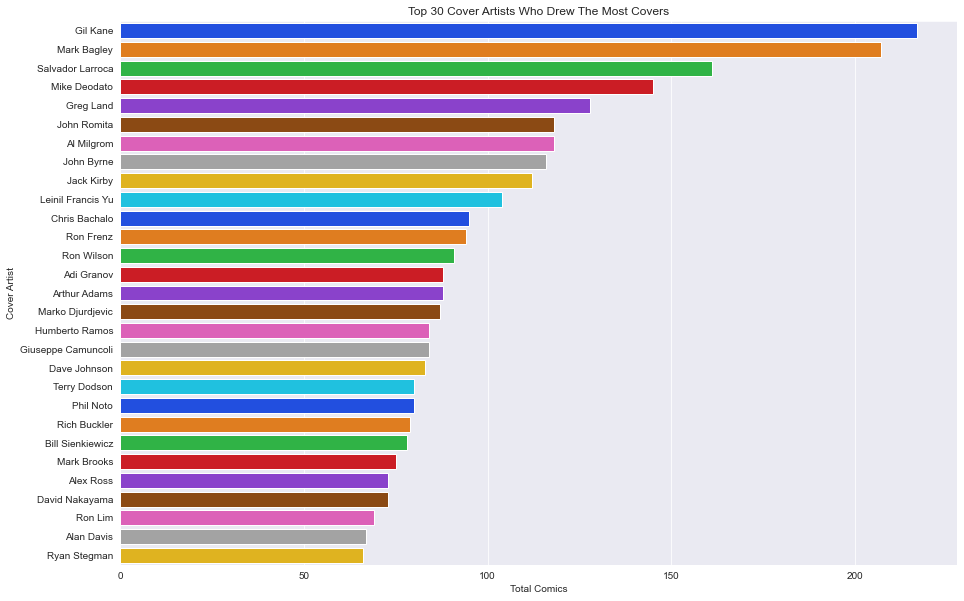

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x='total', y='cover artist', data=artist[1:30], palette='bright')
plt.title('Top 30 Cover Artists Who Drew The Most Covers')
plt.ylabel('Cover Artist')
plt.xlabel('Total Comics');

It appears that Gil Kane drew the most covers by a large margin compared to others.

# Which penciler drew the most comics?

In [16]:
# function that parses column values
def parse_column(column):
    column = column.str.split(',')

    series = list()
    for index, value in column.items():
        series.append(value)

    words = list()
    counts = dict()
    for obj in series:
        for word in obj:
            word = str(word).lstrip()
            words.append(word)

    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1
    counts_items = counts.items()
    data_list = list(counts_items)
    new_df = pd.DataFrame(data_list)
    new_df = new_df.rename({0: column.name, 1: 'total'}, axis=1)
    new_df = new_df.sort_values(by=['total'], ascending=False)
    new_df = new_df.reset_index(drop=True)
    return new_df

In [17]:
mask = new_df['penciler'].notnull()
penciler_df = new_df['penciler'][mask]
penciler = parse_column(penciler_df)

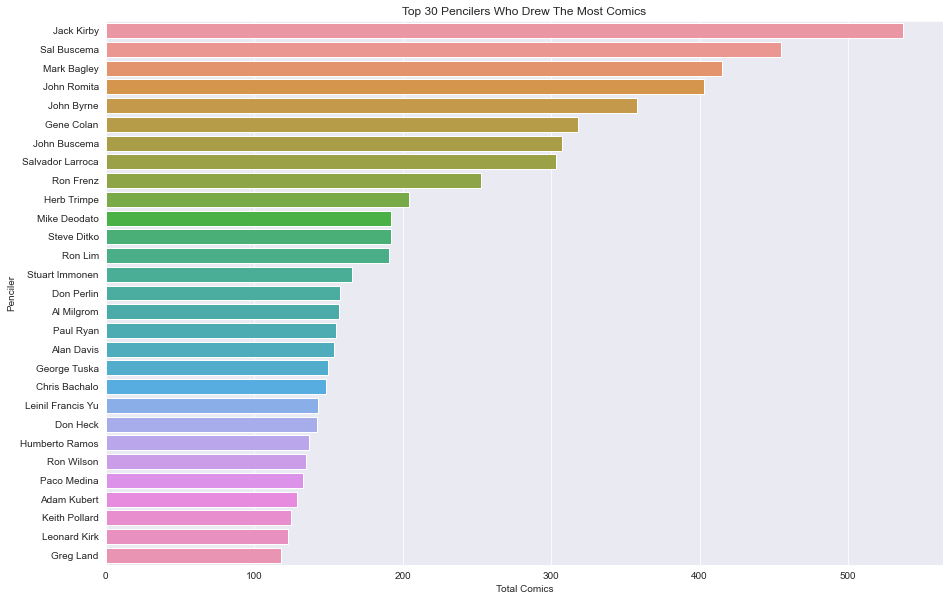

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x='total', y='penciler', data=penciler[1:30])
plt.title('Top 30 Pencilers Who Drew The Most Comics')
plt.ylabel('Penciler')
plt.xlabel('Total Comics');

It appears that Jack Kirby is the penciler who drew the most covers.

# Who wrote the most comics?

In [19]:
mask = new_df['writer'].notnull()
writer_df = new_df['writer'][mask]
writer = parse_column(writer_df)

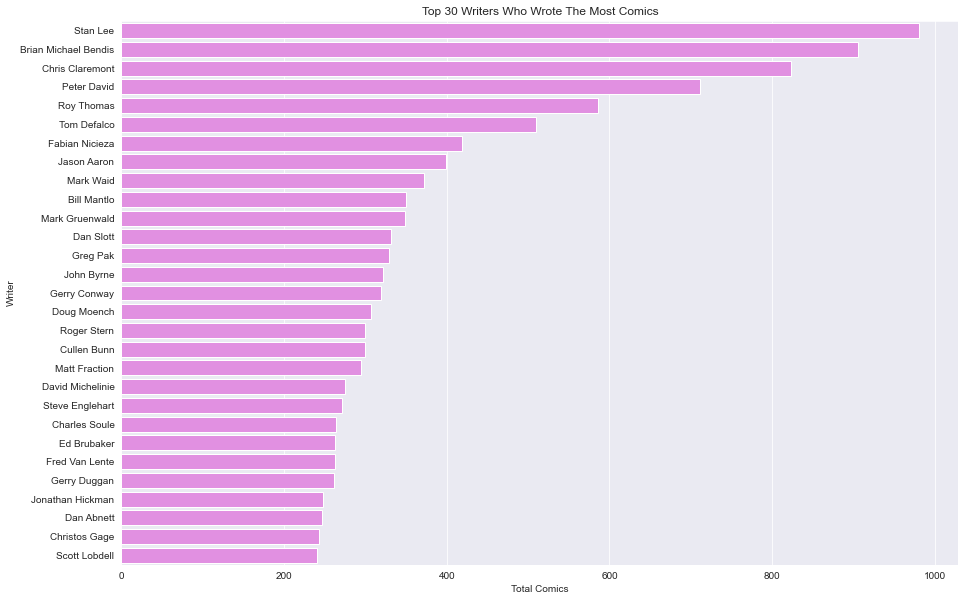

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x='total', y='writer', data=writer[1:30], color='violet')
plt.title('Top 30 Writers Who Wrote The Most Comics')
plt.ylabel('Writer')
plt.xlabel('Total Comics');

It seems Stan Lee has written the most comics - nearly a thousand.

# What are the common key words used in comic names?

In [21]:
# function that parses column values
def parse_column(column):
    column = column.str.split(' ')

    series = list()
    for index, value in column.items():
        series.append(value)

    words = list()
    counts = dict()
    for obj in series:
        for word in obj:
            word = str(word).lstrip()
            words.append(word)

    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1
    counts_items = counts.items()
    data_list = list(counts_items)
    new_df = pd.DataFrame(data_list)
    new_df = new_df.rename({0: column.name, 1: 'total'}, axis=1)
    new_df = new_df.sort_values(by=['total'], ascending=False)
    new_df = new_df.reset_index(drop=True)
    return new_df

In [22]:
mask = new_df['comic_name'].notnull()
name_df = new_df['comic_name'][mask]
name = parse_column(name_df)
name[1:41]

,comic_name,total
1,Marvel,2859
2,The,2697
3,of,2676
4,Spider-Man,2675
5,1998),2450
6,the,2261
7,X-Men,2111
8,Avengers,1860
9,1996),1842
10,2011),1404


The most common key word used in comic names is "Marvel". It is interesting to see that "Spider-Man", "X-Men" and "Avengers" are among the highest words used in comic titles. This may indicate their overwhelming popularity.